# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from Config import weather_api_key as api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [17]:
#testing list
# cities_test = ["seoul", "tokyo", "london"]

In [68]:
# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
hum = []
cloud = []
wspeed = []
country = []
date = []


#counter
counter = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    # Create search query, make request and store in json
    query = query_url + city
    response = requests.get(query)
    response_json = response.json()   
    
    try:
        lat.append(response_json['coord']['lat'])
        lon.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        hum.append(response_json['main']['humidity'])
        cloud.append(response_json['clouds']['all'])
        wspeed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        counter = counter + 1
        print(f" Processing Record {counter} | {city}")
        
    except:
        # Append null values
        print("City not found. Skipping.")
        pass
    


 Processing Record 1 | ponta do sol
 Processing Record 2 | isla mujeres
 Processing Record 3 | mataura
 Processing Record 4 | kulachi
 Processing Record 5 | narsaq
 Processing Record 6 | punta arenas
 Processing Record 7 | samastipur
 Processing Record 8 | longyearbyen
 Processing Record 9 | carnarvon
 Processing Record 10 | diffa
 Processing Record 11 | puerto asis
 Processing Record 12 | castro
 Processing Record 13 | yigou
 Processing Record 14 | yellowknife
 Processing Record 15 | provideniya
 Processing Record 16 | baoqing
 Processing Record 17 | tucuman
City not found. Skipping.
 Processing Record 18 | ushuaia
 Processing Record 19 | hervey bay
 Processing Record 20 | arraial do cabo
 Processing Record 21 | hare bay
 Processing Record 22 | hilo
 Processing Record 23 | vardo
 Processing Record 24 | hithadhoo
 Processing Record 25 | bluff
City not found. Skipping.
 Processing Record 26 | vigrestad
 Processing Record 27 | cape town
 Processing Record 28 | rikitea
 Processing Record 

 Processing Record 225 | pryozerne
 Processing Record 226 | acajutla
 Processing Record 227 | qaanaaq
 Processing Record 228 | prince rupert
 Processing Record 229 | severo-kurilsk
 Processing Record 230 | tromso
 Processing Record 231 | nizwa
 Processing Record 232 | pimentel
 Processing Record 233 | port macquarie
 Processing Record 234 | jacarezinho
 Processing Record 235 | myaundzha
 Processing Record 236 | ghansor
 Processing Record 237 | emba
 Processing Record 238 | chapais
 Processing Record 239 | sangar
 Processing Record 240 | poronaysk
 Processing Record 241 | darnah
 Processing Record 242 | sitka
 Processing Record 243 | doha
 Processing Record 244 | thiruvananthapuram
 Processing Record 245 | touros
City not found. Skipping.
City not found. Skipping.
 Processing Record 246 | paracuru
 Processing Record 247 | turayf
 Processing Record 248 | santa barbara
 Processing Record 249 | nemuro
 Processing Record 250 | barauna
 Processing Record 251 | faya
 Processing Record 252 | k

City not found. Skipping.
 Processing Record 456 | gravdal
 Processing Record 457 | straumen
 Processing Record 458 | skogn
 Processing Record 459 | livramento
 Processing Record 460 | nambucca heads
 Processing Record 461 | monterey
 Processing Record 462 | ugoofaaru
 Processing Record 463 | havoysund
 Processing Record 464 | jaromer
 Processing Record 465 | gizo
City not found. Skipping.
 Processing Record 466 | baijiantan
 Processing Record 467 | thohoyandou
 Processing Record 468 | entre rios
 Processing Record 469 | santa ines
 Processing Record 470 | schroeder
 Processing Record 471 | yerofey pavlovich
 Processing Record 472 | mujiayingzi
 Processing Record 473 | jumla
 Processing Record 474 | baiyin
City not found. Skipping.
 Processing Record 475 | port augusta
 Processing Record 476 | kunya
 Processing Record 477 | aloleng
 Processing Record 478 | midland
 Processing Record 479 | westport
 Processing Record 480 | benguela
 Processing Record 481 | talcahuano
 Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
# Create DataFrame
#value error: array must be the same length
#solution: https://stackoverflow.com/questions/40442014/python-pandas-valueerror-arrays-must-be-all-same-length
city_weather_df = pd.DataFrame.from_dict({
    'city' : cities,
    'lat': lat,
    'lon': lon,
    'max temp': max_temp,
    'humidity': hum,
    'cloudiness': cloud,
    'wind_speed': wspeed,
    'country' : country,
    'date' : date
}, orient='index')
weather_df = city_weather_df.transpose()


In [73]:
#cities values outnumbered other column values - clean up
#resource: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
cleaned_df = weather_df.dropna()

In [74]:
cleaned_df.count()

city          563
lat           563
lon           563
max temp      563
humidity      563
cloudiness    563
wind_speed    563
country       563
date          563
dtype: int64

In [75]:
# Export the city data into weather_city.csv
cleaned_df.to_csv('../output_data/weather_city.csv', index=False)

In [76]:
# Display the DataFrame
cleaned_df.head()

,city,lat,lon,max temp,humidity,cloudiness,wind_speed,country,date
0,ponta do sol,32.67,-17.1,71.6,78,20,20.8,PT,1596334135
1,isla mujeres,21.23,-86.73,84.2,79,20,4.7,MX,1596334135
2,mataura,-46.19,168.86,53.26,84,100,1.54,NZ,1596334135
3,kulachi,31.93,70.46,96.48,43,0,7.72,PK,1596334135
4,narsaq,60.92,-46.05,48.2,70,99,3.36,GL,1596334136


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [86]:
#locate data with humidity > 100%
hum_outliers = cleaned_df.loc[cleaned_df['humidity'] > 100] #no cities with move on


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

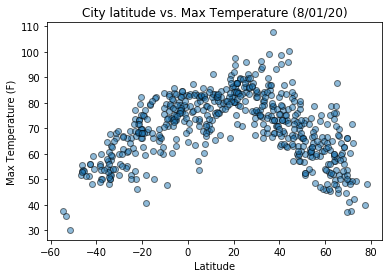

In [15]:
# Generate a scatter plot of City Latitude vs Max Temperature
chart_data = pd.read_csv('../output_data/weather_city.csv')

# Chart Titles
plt.title("City latitude vs. Max Temperature (8/01/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

y_axis = chart_data["max temp"]
x_axis = chart_data["lat"]

plt.scatter(x_axis, y_axis, marker="o", color="tab:blue", edgecolors='black', alpha=0.5)
plt.show()

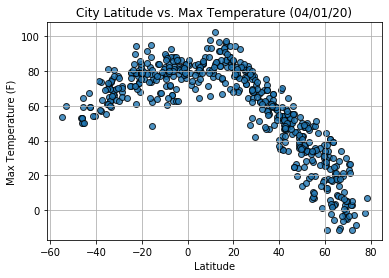

## Latitude vs. Humidity Plot

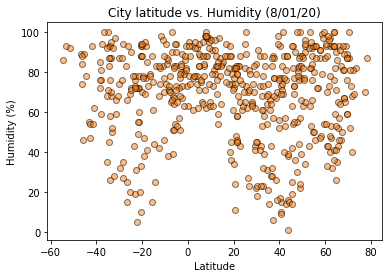

In [16]:
# Chart Titles
plt.title("City latitude vs. Humidity (8/01/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

y_axis = chart_data["humidity"]
x_axis = chart_data["lat"]

plt.scatter(x_axis, y_axis, marker="o", color="tab:orange", edgecolors='black', alpha=0.5)
plt.show()

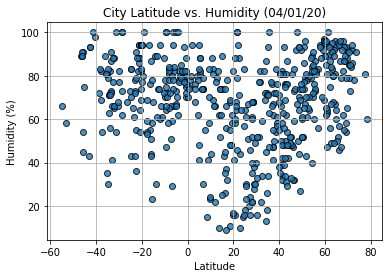

## Latitude vs. Cloudiness Plot

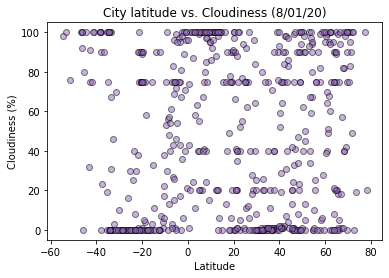

In [17]:
# Chart Titles
plt.title("City latitude vs. Cloudiness (8/01/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

y_axis = chart_data["cloudiness"]
x_axis = chart_data["lat"]

plt.scatter(x_axis, y_axis, marker="o", color="tab:purple", edgecolors='black', alpha=0.5)
plt.show()

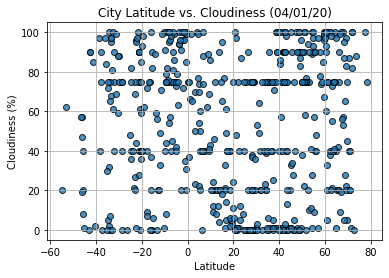

## Latitude vs. Wind Speed Plot

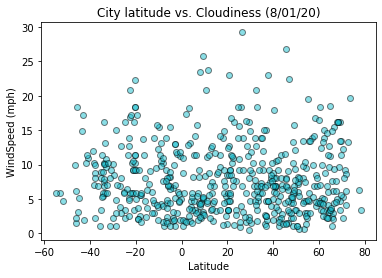

In [18]:
# Chart Titles
plt.title("City latitude vs. Cloudiness (8/01/20)")
plt.ylabel("WindSpeed (mph)")
plt.xlabel("Latitude")

y_axis = chart_data["wind_speed"]
x_axis = chart_data["lat"]

plt.scatter(x_axis, y_axis, marker="o", color="tab:cyan", edgecolors='black', alpha=0.5)
plt.show()

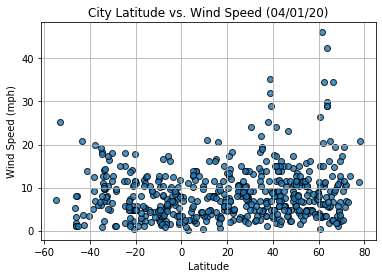

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


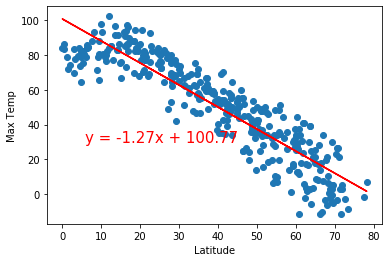

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


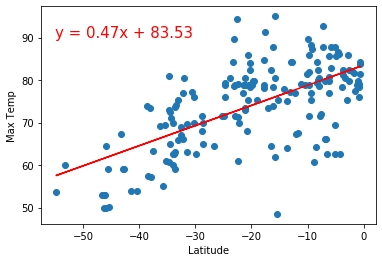

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


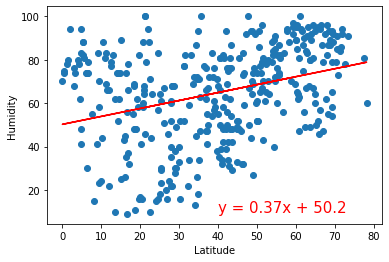

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


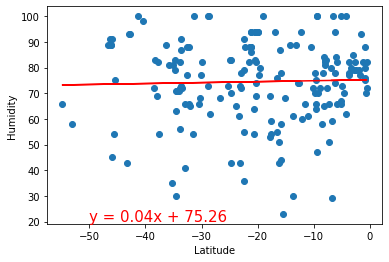

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


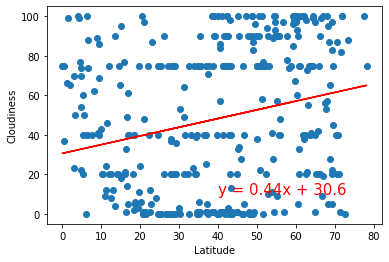

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


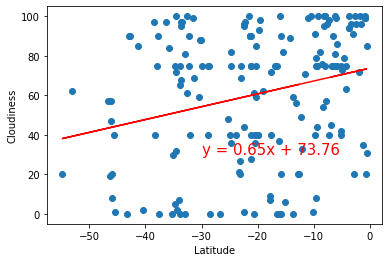

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


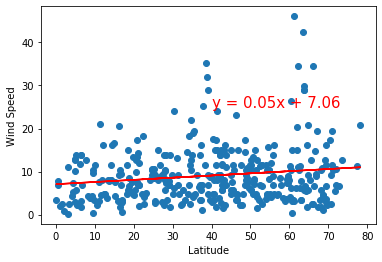

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


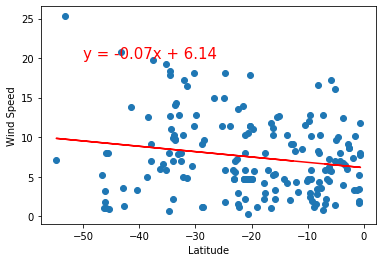